### Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestRegressor

import warnings # supress warnings
warnings.filterwarnings("ignore")

### Load the CSV Data

In [2]:
train = pd.read_csv("../../../../data/train_V2.csv")
test = pd.read_csv("../../../../data/test_V2.csv")

### Identify Dimensions

In [3]:
train.shape

(4446966, 29)

In [4]:
test.shape

(1934174, 28)

### Describe the Data Types

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


### Missing Values

In [7]:
missing_data = train.isna().sum().to_frame()
missing_data

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


In [8]:
train['top10'] = np.where(train['winPlacePerc']>0.9, 1, 0)
train['top10'].head()

0    0
1    0
2    0
3    0
4    0
Name: top10, dtype: int32

### Downsample Majority Class To Match Minority Class

In [9]:
# Indicies of each class' observations
# i_class0 = np.where(train['top10'] == 0)[0]
# i_class1 = np.where(train['top10'] == 1)[0]

# i_class0 = np.where((train['top10'] == 0) & (train['matchType'] == 'solo'))[0]
# i_class1 = np.where((train['top10'] == 1) & (train['matchType'] == 'solo'))[0]


i_class0 = np.where((train['top10'] == 0) & (train['matchType'].str.startswith('solo')))[0]
i_class1 = np.where((train['top10'] == 1) & (train['matchType'].str.startswith('solo')))[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 1, randomly sample from class 0 without replacement
i_class0_downsampled = np.random.choice(i_class0, size=n_class1, replace=False)

# Join together class 1's target vector with the downsampled class 0's target vector
# np.hstack((train.loc[i_class1], train.loc[i_class0_downsampled]))


df1 = train.loc[i_class1]
df2 = train.loc[i_class0_downsampled]

frames = [df1, df2]

train.mod = pd.concat(frames)

Log Reg: 0.851281 (0.023629)
LDA: 0.843170 (0.027729)
KNN: 0.850966 (0.046216)
Naive Bayes: 0.835910 (0.024234)
Decision Tree: 0.844424 (0.011693)


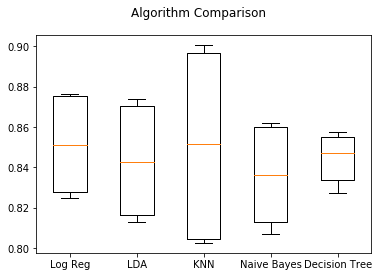

In [10]:
# load dataset
names = ['walkDistance', 'killPlace', 'boosts', 'weaponsAcquired', 'damageDealt', 'heals', 'kills', 'top10']

dataframe = train.mod[names]
array = dataframe.values

X = array[:,0:7]
Y = array[:,7]

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []

models.append(('Log Reg', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))



# models.append(('RF', RandomForestRegressor(n_estimators = 1000, random_state = 42)))
# models.append(('KMEANS', KMeans()))
# models.append(('SVM', SVC()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()